<a href="https://colab.research.google.com/github/NikethML/dev/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
url='https://github.com/NikethML/dev/blob/main/input/License_Data.csv?raw=true'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [7]:
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [8]:
df["LICENSE STATUS"].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [9]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name

In [10]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [11]:
df["license_description"].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: license_description, Length: 106, dtype: int64

In [12]:
df.license_description.value_counts(normalize=True)[:10]

Limited Business License             0.583014
Home Repair                          0.123791
Peddler, non-food                    0.032738
Home Occupation                      0.032703
Retail Food Establishment            0.027021
Massage Therapist                    0.022725
Street Performer                     0.021992
Scavenger, Private                   0.018034
Hazardous Materials                  0.013109
Residential Real Estate Developer    0.012655
Name: license_description, dtype: float64

### Univariate Analysis

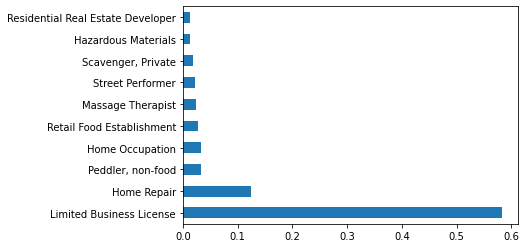

In [13]:
# Let's calculate the percentage of each job status category.
df.license_description.value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.license_description.value_counts(normalize=True)[:10].plot.barh()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


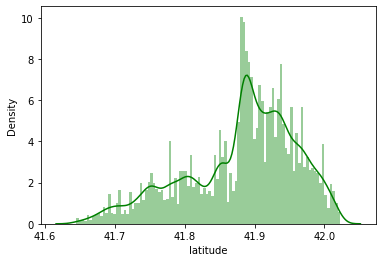

In [14]:
sns.distplot(df['latitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


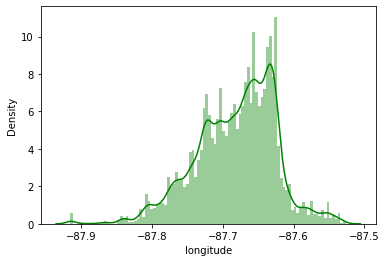

In [15]:
sns.distplot(df['longitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

### Bivariate Analysis

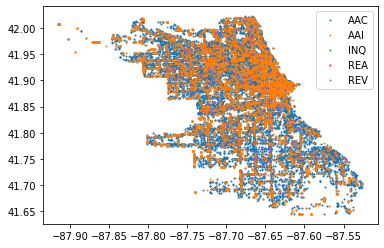

In [16]:
sdf = df[["longitude","latitude","license_status"]]
groups = sdf.groupby('license_status')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
ax.legend()

plt.show()

In [17]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


In [18]:
pd.crosstab(df["license_status"],df["application_type"]).columns

Index(['C_CAPA', 'C_EXPA', 'C_LOC', 'ISSUE', 'RENEW'], dtype='object', name='application_type')

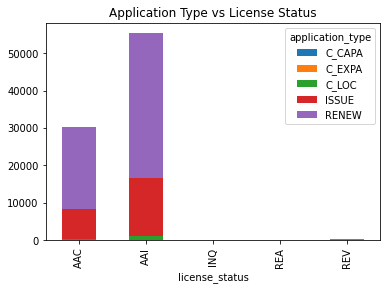

In [19]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index().plot(x='license_status', kind='bar', stacked=True,
        title='Application Type vs License Status')

In [20]:
pd.crosstab(df["license_status"],df["conditional_approval"])

conditional_approval,N,Y
license_status,,
AAC,30182,18
AAI,55400,0
INQ,2,0
REA,3,0
REV,290,0


### Outlier Detection 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


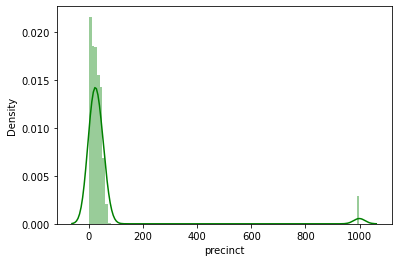

In [21]:
sns.distplot(df['precinct'], color='g', bins=100, hist_kws={'alpha': 0.4})

#### Box Plot

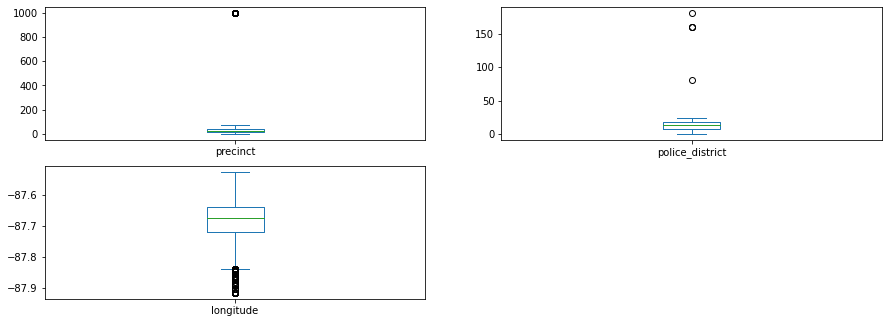

In [22]:
df[["precinct","police_district","longitude"]].plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

### Inter Quartile Range
IQR = 75th percentile - 25th percentile <br>
<br>
Lower Bound = q1–1.5*IQR <br>
Upper Bound = q3+1.5*IQR <br>

In [23]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - 1.5 * iqr
    max_ = q3 + 1.5 * iqr
    return col[((col < min_) | (col > max_))]

In [24]:
iqr(df.precinct)

9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64

###  Z-score method

Z-Score = (X-mean) / Standard deviation

In [25]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(col,lb,ub):
    zscore = ((col - col.mean()) / col.std()).copy()
    return col[((zscore < lb) | (zscore > ub))]

In [26]:
zscore_outlier(df.precinct,-3,3)

9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64